In [1]:
import os
import sys
import numpy as np
import pandas as pd

import sklearn
import sklearn.metrics
import networkx as nx

import matplotlib
import matplotlib.pyplot as plt
# plt.style.use('seaborn-paper')
import seaborn as sns
matplotlib.rc('text', usetex=True)

import time, datetime
import itertools

In [2]:
data_name = 'alpha'

network_df = pd.read_csv('../rev2data/%s/%s_network.csv' %(data_name, data_name), header=None, names=['src', 'dest', 'rating', 'timestamp'], parse_dates=[3], infer_datetime_format=True)

user_list = ['u' + str(u) for u in network_df['src'].tolist()]

gt_df = pd.read_csv('../rev2data/%s/%s_gt.csv' %(data_name, data_name), header=None, names=['id', 'label'])
gt = dict([('u'+str(x[0]), x[1]) for x in zip(gt_df['id'], gt_df['label'])])

## Computation
+ average precision grid
+ evading grid

In [4]:
ap_mat = np.zeros((11, 11))
er_mat = np.zeros((11, 11))
auc_mat = np.zeros((11, 11))

for k, n in itertools.product(range(11), range(11)):
    score_df = pd.read_csv('../rev2res/%s-%d-%d.csv' %(data_name, k, n), header=None)
    user_score = dict(zip(score_df[0], score_df[1]))
    u_list = [u for u in user_score if u in gt or u not in user_list]
    ytrue = [1 if u in gt and gt[u] == 1 else 0 for u in u_list]
    yscore = [user_score[u] for u in u_list]
    ap = sklearn.metrics.average_precision_score(y_score=yscore, y_true=ytrue)
    auc = sklearn.metrics.roc_auc_score(y_score=yscore, y_true=ytrue)
    evade_list = [u for u in user_score if u not in user_list]
    er = 0
    if len(evade_list) > 0:
        er = sum([1 for u in evade_list if user_score[u] > 0]) / len(evade_list)
        er_mat[k, n] = er
    ap_mat[k, n] = ap
    auc_mat[k, n] = auc
    print(k, n, 'ap', ap, 'auc', auc, 'er', er)

0 0 ap 0.602289931784925 auc 0.45341672031638 er 0
0 1 ap 0.602289931784925 auc 0.45341672031638 er 0
0 2 ap 0.602289931784925 auc 0.45341672031638 er 0
0 3 ap 0.6612477210075506 auc 0.5172445507219718 er 0
0 4 ap 0.6043939977014396 auc 0.4581992090499402 er 0
0 5 ap 0.6043055791991723 auc 0.4575554124896533 er 0
0 6 ap 0.602289931784925 auc 0.45341672031638 er 0
0 7 ap 0.602289931784925 auc 0.45341672031638 er 0
0 8 ap 0.602289931784925 auc 0.45341672031638 er 0
0 9 ap 0.602289931784925 auc 0.45341672031638 er 0
0 10 ap 0.602289931784925 auc 0.45341672031638 er 0
1 0 ap 0.6104543852089448 auc 0.48553859202714167 er 0.0
1 1 ap 0.6091258784393293 auc 0.48367260390161154 er 0.0
1 2 ap 0.5886034474527153 auc 0.4555555555555556 er 0.0
1 3 ap 0.5895310002163059 auc 0.4525869380831213 er 0.0
1 4 ap 0.5843058799907301 auc 0.44648006785411365 er 0.0
1 5 ap 0.5815809184321621 auc 0.44804919423240036 er 0.0
1 6 ap 0.5872378762366753 auc 0.4531806615776081 er 0.0
1 7 ap 0.582073479486748 auc 0.44

## Vary n

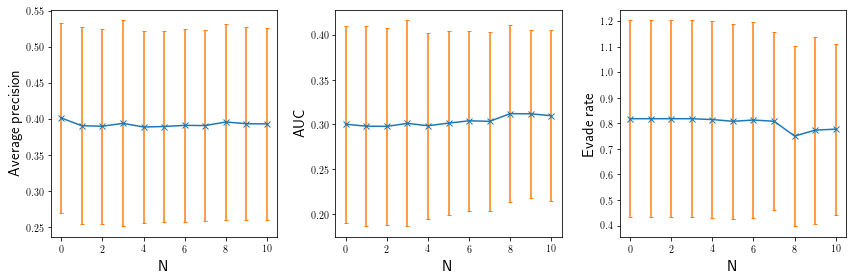

In [5]:
nfig, axes = plt.subplots(1, 3, figsize=(12, 4))

ax = axes[0]
x = np.arange(11)
y = np.mean(ap_mat, axis=0)
e = np.std(ap_mat, axis=0)
ax.plot(x, y, marker='x')
ax.errorbar(x, y, e, linestyle='None', capsize=2)
ax.set_ylabel('Average precision', fontsize=15)
ax.set_xlabel('N', fontsize=15)

ax = axes[1]
x = np.arange(11)
y = np.mean(auc_mat, axis=0)
e = np.std(auc_mat, axis=0)
ax.plot(x, y, marker='x')
ax.errorbar(x, y, e, linestyle='None', capsize=2)
ax.set_ylabel('AUC', fontsize=15)
ax.set_xlabel('N', fontsize=15)

ax = axes[2]
x = np.arange(11)
y = np.mean(er_mat, axis=0)
e = np.std(er_mat, axis=0)
ax.plot(x, y, marker='x')
ax.errorbar(x, y, e, linestyle='None', capsize=2)
ax.set_ylabel('Evade rate', fontsize=15)
ax.set_xlabel('N', fontsize=15)

nfig.tight_layout()

## Vary N given k

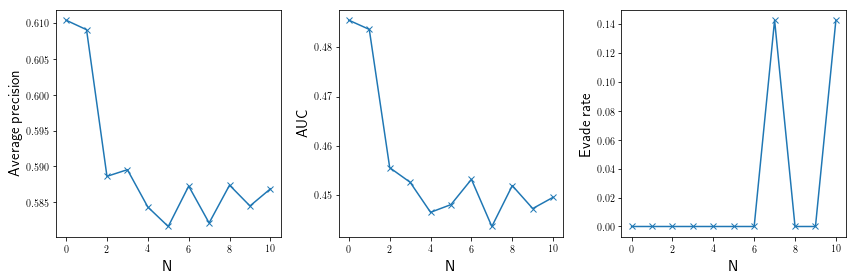

In [13]:
knfig, axes = plt.subplots(1, 3, figsize=(12, 4))

k = 1
ax = axes[0]
x = np.arange(11)
y = ap_mat[k, :]
ax.plot(x, y, marker='x')
# ax.errorbar(x, y, e, linestyle='None', capsize=2)
ax.set_ylabel('Average precision', fontsize=15)
ax.set_xlabel('N', fontsize=15)

ax = axes[1]
x = np.arange(11)
y = auc_mat[k, :]
ax.plot(x, y, marker='x')
# ax.errorbar(x, y, e, linestyle='None', capsize=2)
ax.set_ylabel('AUC', fontsize=15)
ax.set_xlabel('N', fontsize=15)

ax = axes[2]
x = np.arange(11)
y = er_mat[k, :]
ax.plot(x, y, marker='x')
# ax.errorbar(x, y, e, linestyle='None', capsize=2)
ax.set_ylabel('Evade rate', fontsize=15)
ax.set_xlabel('N', fontsize=15)

knfig.tight_layout()

## Vary k

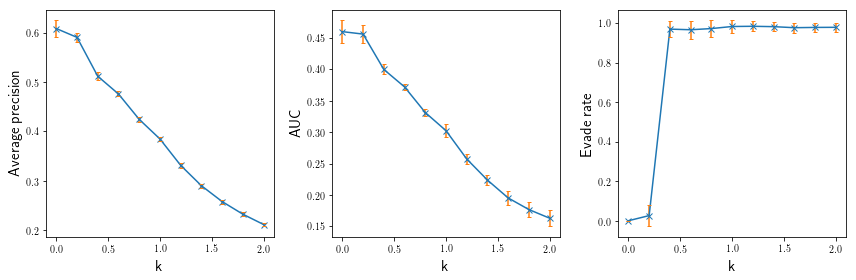

In [8]:
kfig, axes = plt.subplots(1, 3, figsize=(12, 4))

ax = axes[0]
x = np.arange(11)/5
y = np.mean(ap_mat, axis=1)
e = np.std(ap_mat, axis=1)
ax.plot(x, y, marker='x')
ax.errorbar(x, y, e, linestyle='None', capsize=2)
ax.set_ylabel('Average precision', fontsize=15)
ax.set_xlabel('k', fontsize=15)

ax = axes[1]
x = np.arange(11)/5
y = np.mean(auc_mat, axis=1)
e = np.std(auc_mat, axis=1)
ax.plot(x, y, marker='x')
ax.errorbar(x, y, e, linestyle='None', capsize=2)
ax.set_ylabel('AUC', fontsize=15)
ax.set_xlabel('k', fontsize=15)

ax = axes[2]
x = np.arange(11)/5
y = np.mean(er_mat, axis=1)
e = np.std(er_mat, axis=1)
ax.plot(x, y, marker='x')
ax.errorbar(x, y, e, linestyle='None', capsize=2)
ax.set_ylabel('Evade rate', fontsize=15)
ax.set_xlabel('k', fontsize=15)

kfig.tight_layout()

In [14]:
nfig.savefig('../rev2fig/%s-n.pdf' %data_name)
kfig.savefig('../rev2fig/%s-k.pdf' %data_name)
knfig.savefig('../rev2fig/%s-kn.pdf' %data_name)